<a href="https://colab.research.google.com/github/mhyls26/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [24]:
import sklearn
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


print(sklearn.__version__)
print(pd.__version__)

1.6.1
2.2.2


## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [13]:
import pandas as pd
df = pd.read_excel('/IGfriends.xlsx')
print(df.head())

       Name  SharePostFrequently  Active  RepliesToPostsMsgs  \
0  Ren_hanz                    0       0                   0   
1      jhay                    1       1                   1   
2      dajz                    1       1                   0   
3    riri 🪽                    1       1                   1   
4      Cael                    1       1                   1   

   FriendFollowerCount  Personality  
0                    7            0  
1                  739            1  
2                  163            1  
3                  173            1  
4                  253            1  


Display the summary of all the features of the dataset using `.info()`

In [14]:
# put your answer here
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 100 non-null    object
 1   SharePostFrequently  100 non-null    int64 
 2   Active               100 non-null    int64 
 3   RepliesToPostsMsgs   100 non-null    int64 
 4   FriendFollowerCount  100 non-null    int64 
 5   Personality          100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [15]:
# put your answer here
print("\nPersonality distribution:")
print(df['Personality'].value_counts())


Personality distribution:
Personality
1    53
0    47
Name: count, dtype: int64


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

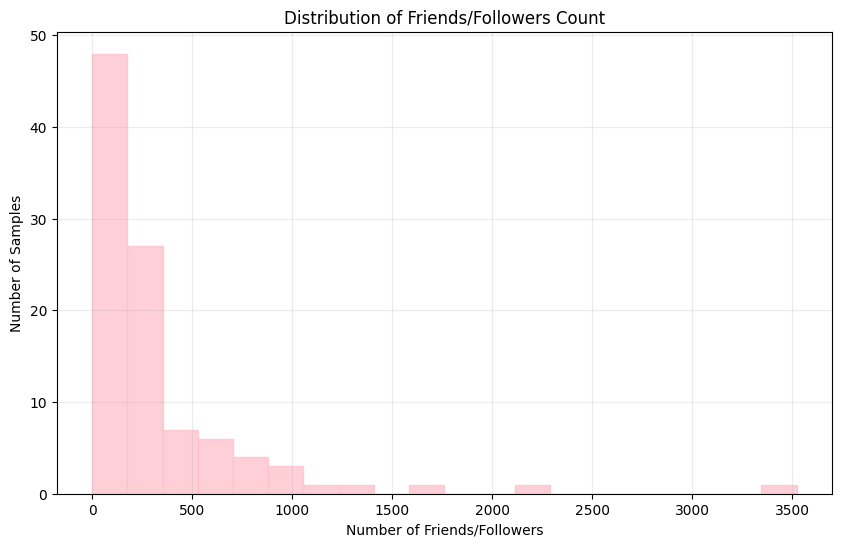

In [19]:
# put your answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['FriendFollowerCount'], bins=20, alpha=0.75, color='pink', edgecolor='pink')
plt.xlabel('Number of Friends/Followers')
plt.ylabel('Number of Samples')
plt.title('Distribution of Friends/Followers Count')
plt.grid(True, alpha=0.25)

Remove the name column using `drop()` method

In [20]:
# put your answer here

df_clean = df.drop('Name', axis=1)
print("\n Dataset after removing column of 'Name'")
print(df_clean)


 Dataset after removing column of 'Name'
    SharePostFrequently  Active  RepliesToPostsMsgs  FriendFollowerCount  \
0                     0       0                   0                    7   
1                     1       1                   1                  739   
2                     1       1                   0                  163   
3                     1       1                   1                  173   
4                     1       1                   1                  253   
..                  ...     ...                 ...                  ...   
95                    0       0                   0                   61   
96                    1       1                   1                  100   
97                    0       0                   0                  472   
98                    1       1                   1                  168   
99                    1       1                   1                  553   

    Personality  
0             0  
1        

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [21]:
# put your answer here

X = df_clean.drop('Personality', axis=1).values
print(f"\nFeatures shape: {X.shape}")


Features shape: (100, 4)


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [22]:
# put your answer here
y = df_clean['Personality'].values
print(f"Labels shape: {y.shape}")

Labels shape: (100,)


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [25]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Display the dimensions of each variables using `.shape()`

In [26]:
# put your answer here
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 4)
X_test shape: (20, 4)
y_train shape: (80,)
y_test shape: (20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [27]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [28]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [29]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

In [30]:
# put your answer here
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 8  1]
 [ 0 11]]


Display the accuracy

<Figure size 800x600 with 0 Axes>

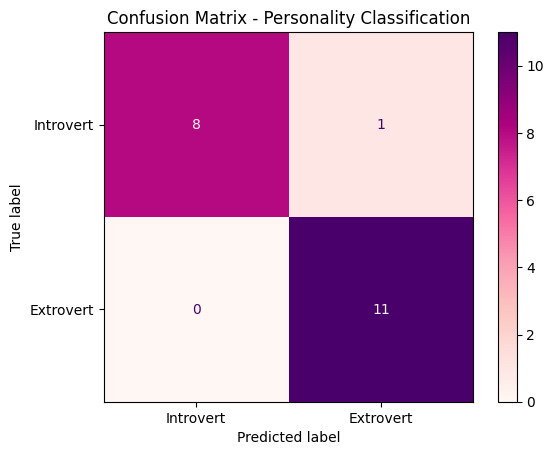

In [51]:
# put your answer here
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix - Personality Classification')
plt.show()

Display the precision

In [52]:
# put your answer here
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Accuracy: 0.9500 (95.00%)


Display the recall

In [54]:
# put your answer here
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 1.0000


Display the f1-score

In [55]:
# put your answer here
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.9565


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Fit the scaler on your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # learn mean/std from training data
X_test_scaled = scaler.transform(X_test)        # scale test set using same scaler

# 2. Fit KNN model on scaled training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 3. Scale your new input features
my_features = [[0, 1, 1, 1006]]
my_features_scaled = scaler.transform(my_features)

# 4. Predict personality
my_prediction = knn.predict(my_features_scaled)
personality = 'Extrovert' if my_prediction[0] == 1 else 'Introvert'

print(f"\nPrediction for Profile 1: {personality}")


Prediction for Profile 1: Extrovert
